# Practice 2 - Data Augmentation

In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/aiffel/aiffel/data_augmentation/images/mycat.jpg'

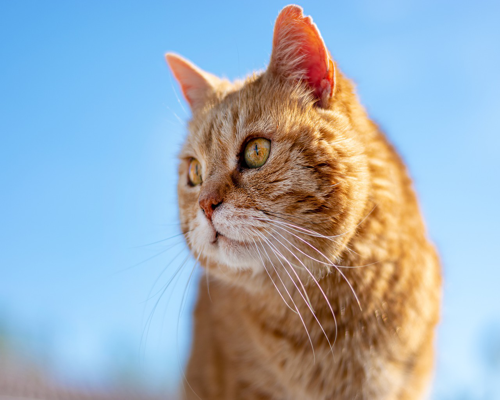

In [2]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

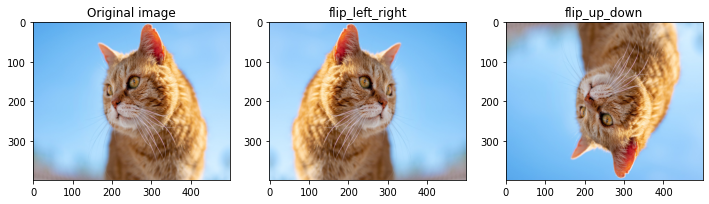

In [3]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

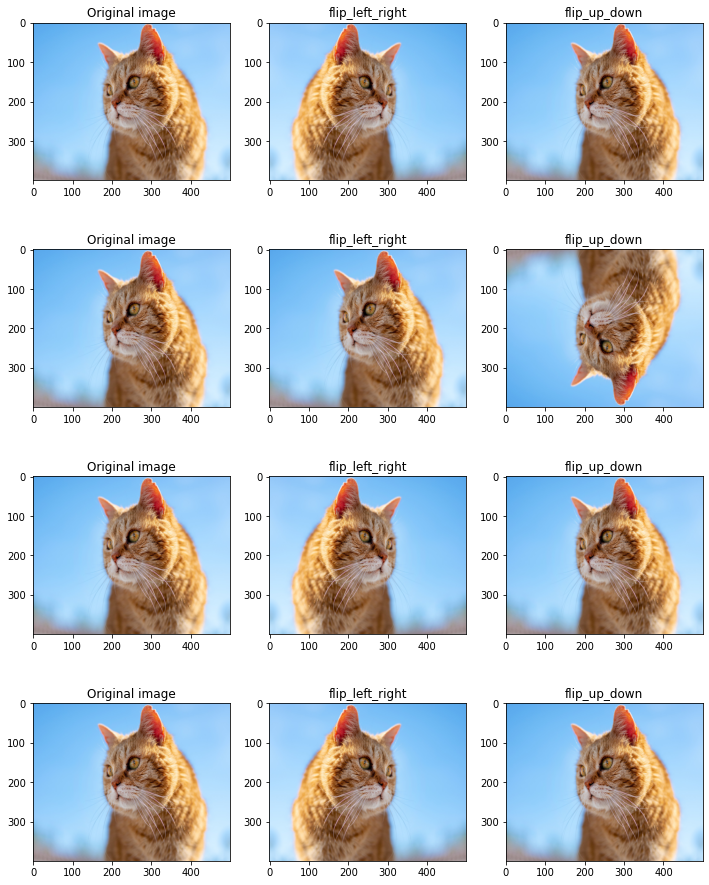

In [4]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

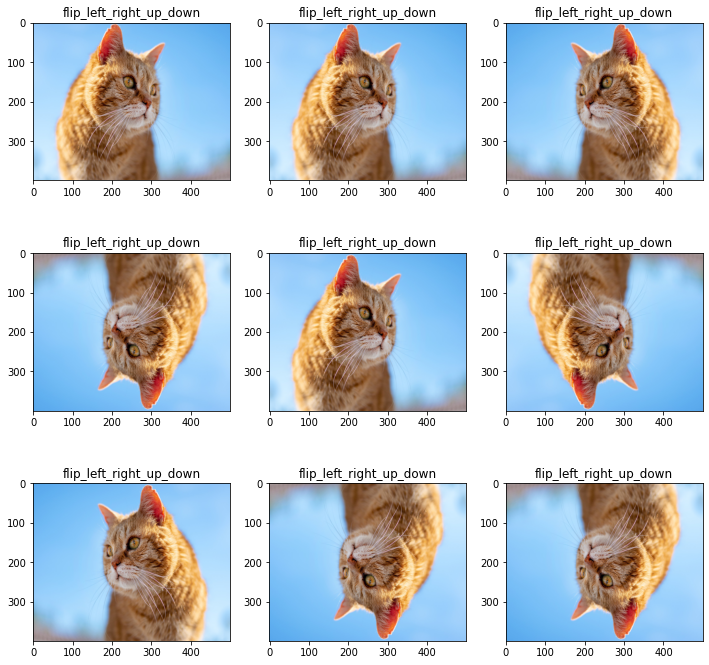

In [5]:
# Q. random_flip 을 구현하세요.

def random_flip(image_tensor):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor) #hint : random_flip_left_right()
    flip_ud_lr_tensor = tf.image.random_flip_up_down(flip_lr_tensor) #hint : random_flip_up_down()
    flip_ud_lr_image = tf.keras.preprocessing.image.array_to_img(flip_ud_lr_tensor) #hint : array_to_img()
    return flip_ud_lr_image

plt.figure(figsize=(12, 12))

num = 9
for i in range(num):
    plt.subplot(3,3,i+1)
    plt.title('flip_left_right_up_down')
    plt.imshow(random_flip(image_tensor)) #hint : plt.imshow(함수)

tf.Tensor([400 500   3], shape=(3,), dtype=int32)
tf.Tensor([300 376   3], shape=(3,), dtype=int32)
tf.Tensor([200 250   3], shape=(3,), dtype=int32)
tf.Tensor([100 126   3], shape=(3,), dtype=int32)
tf.Tensor([40 50  3], shape=(3,), dtype=int32)


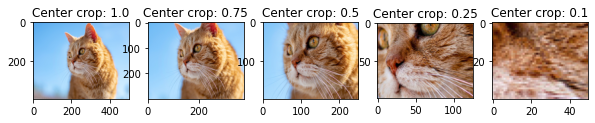

In [14]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)
    print(tf.shape(cropped_img))

In [12]:
def random_central_crop(image_tensor, range=(0, 1)):
    # range 범위에서 무작위로 잘라낼 비율을 선택합니다
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor
print('=3')

=3


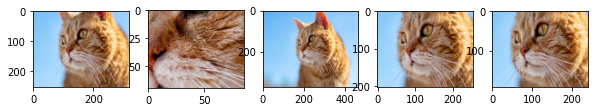

In [22]:
plt.figure(figsize=(12, 15))

col = 5
for i in range(col):
    cropped_tensor = random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

---

### tf.image

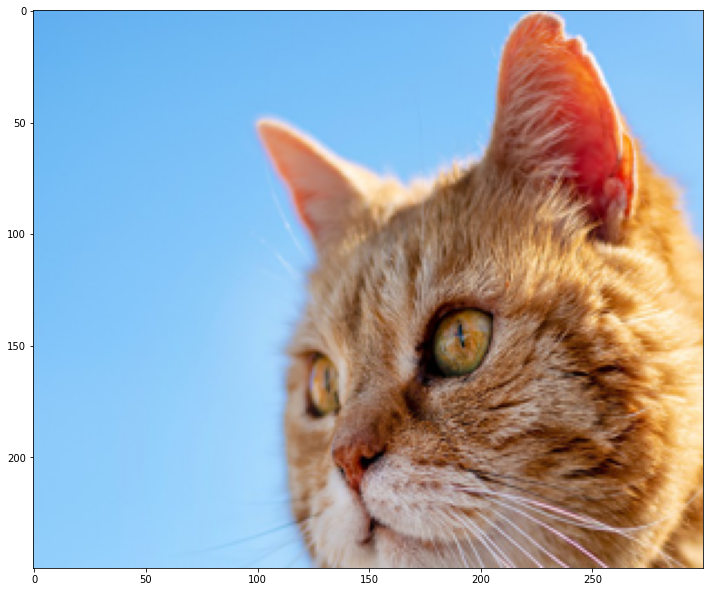

In [16]:
# apply random_crop on cat image 
plt.figure(figsize=(12, 15))

random_crop_tensor = tf.image.random_crop(image_tensor, (250, 300, 3))
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_image)
plt.show()

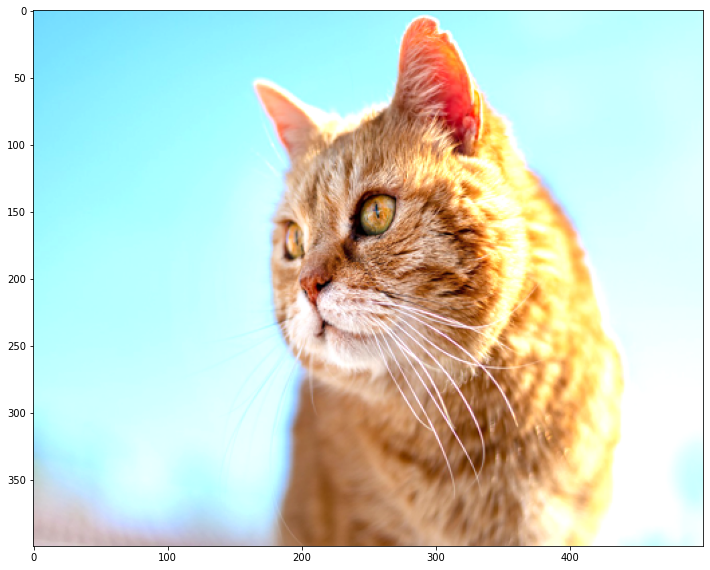

In [17]:
# apply random_brightness on cat image 
plt.figure(figsize=(12, 15))

random_bright_tensor = tf.image.random_brightness(image_tensor, 128)
cliped_random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(cliped_random_bright_tensor)

plt.imshow(random_bright_image)
plt.show()

In [18]:
import numpy as np
image = Image.open(sample_img_path).resize((400, 300)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_arr = np.array(image)
image_arr.shape

(300, 400, 3)

In [27]:
def visualize(image, i=0):
    plt.subplot(2,5,i+1)
    plt.imshow(image)

print("슝")

슝


---

### albumentations library

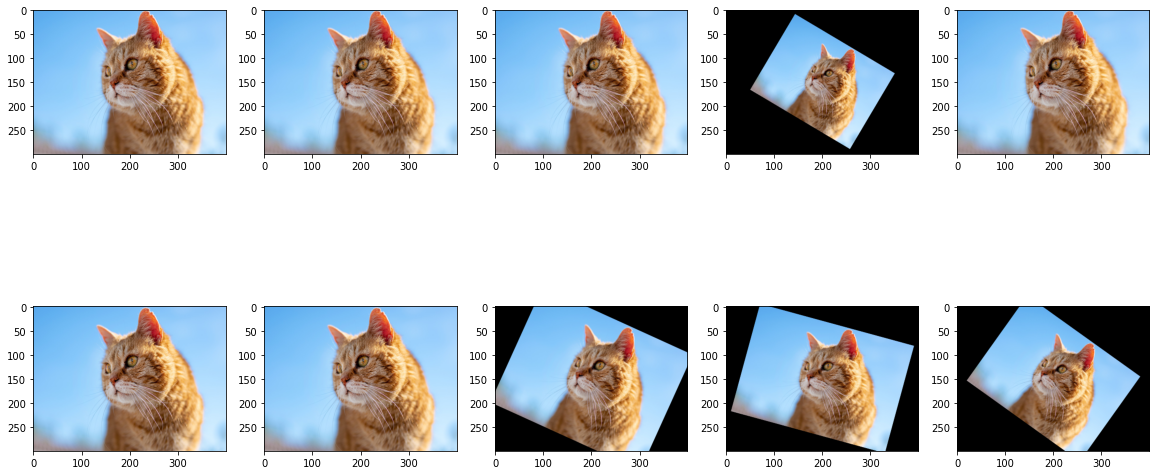

In [25]:
import albumentations as A

plt.figure(figsize=(20, 10))

for i in range(10):
    transform = A.Compose([
        A.Affine(rotate=(-45, 45),scale=(0.5,0.9),p=0.5) 
    ])
    transformed = transform(image=image_arr)
    visualize(transformed['image'], i)

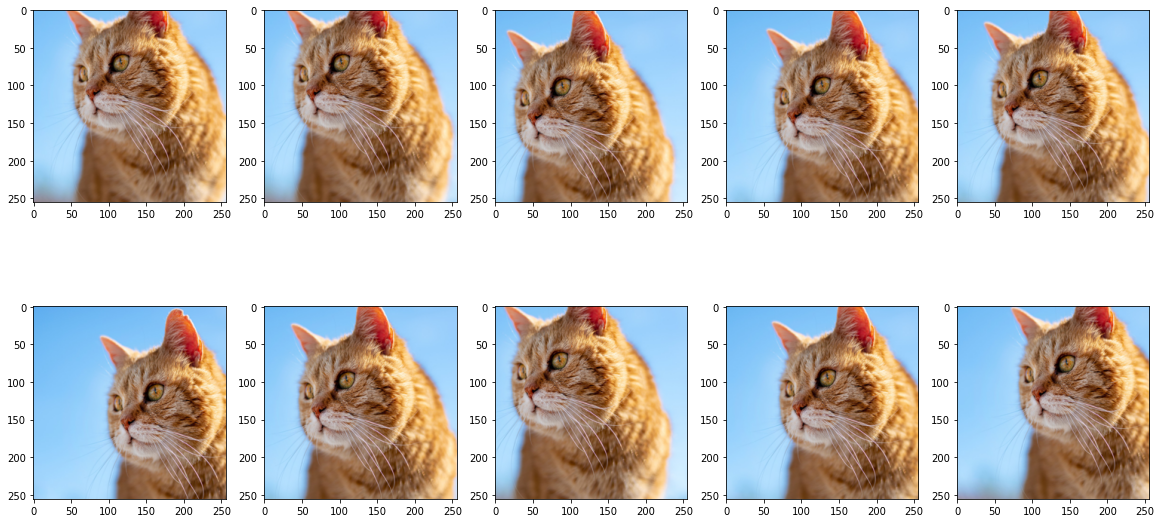

In [26]:
plt.figure(figsize=(20, 10))

for i in range(10):
    transform = A.Compose(
        [A.RandomCrop(width=256, height=256)]
    )
    transformed = transform(image=image_arr)
    visualize(transformed['image'], i)

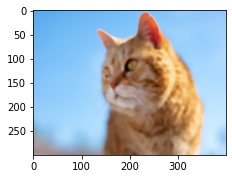

In [28]:
plt.figure(figsize=(20, 10))

transform = A.Compose(
    [A.MedianBlur(blur_limit=7, always_apply=False, p=0.5)]
)
transformed = transform(image=image_arr)
visualize(transformed['image'])

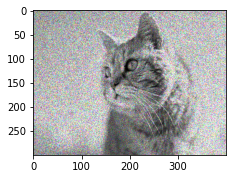

In [29]:
plt.figure(figsize=(20, 10))

transform = A.Compose(
    [A.ToGray(p=1),
    A.MultiplicativeNoise(multiplier=[0.5, 1.5], elementwise=True, per_channel=True, p=1)]
)
transformed = transform(image=image_arr)
visualize(transformed['image'])

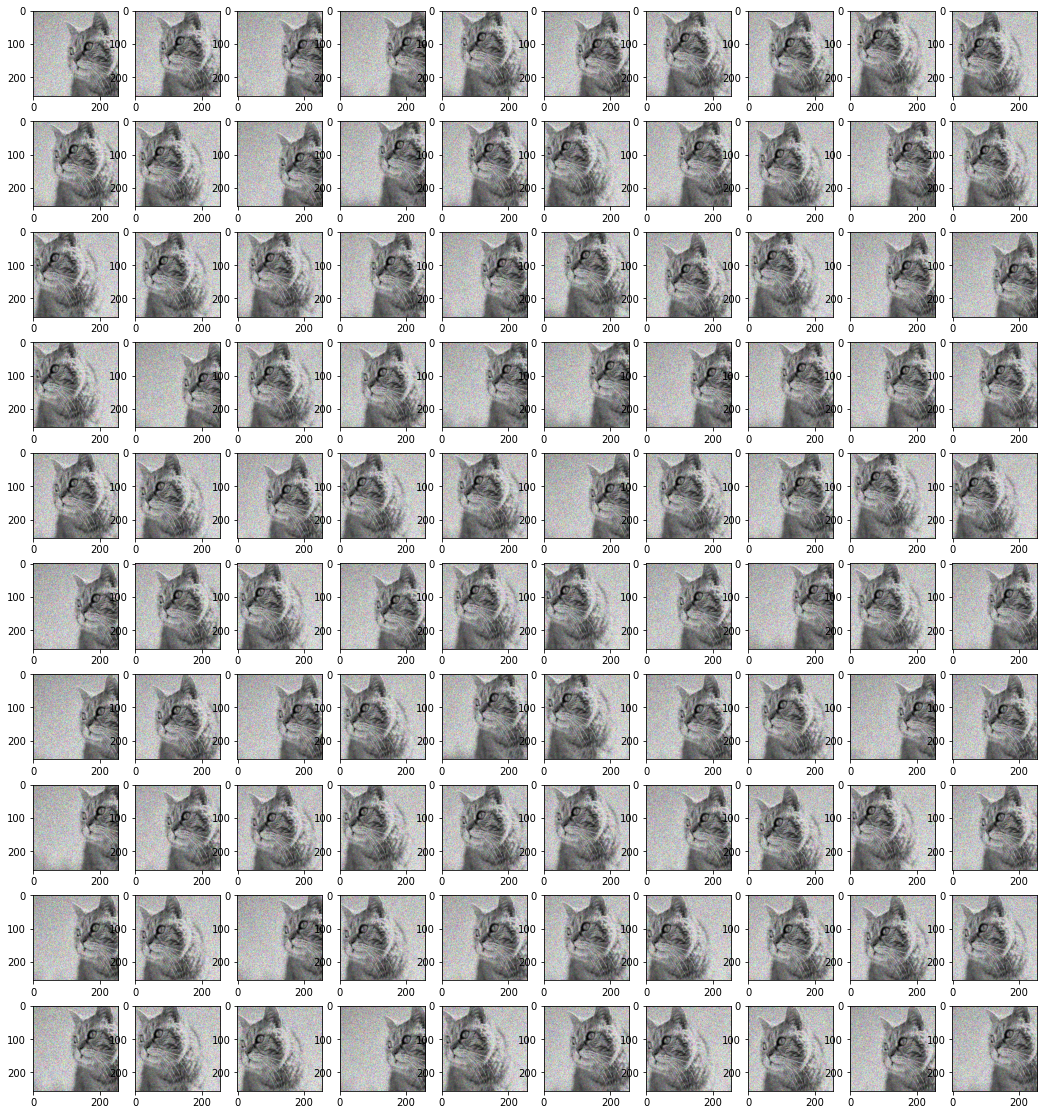

In [30]:
# Use various techniques and functions in albumentations library. show 100 images.
# 여기에 코드를 입력해 주세요.
def transform_data(img_arr):
    transform = A.Compose(
        [
          A.ToGray(p=1), # hint : A.ToGray()
          A.MultiplicativeNoise(multiplier=[0.5, 1.5], elementwise=True, per_channel=True, p=1), # hint : A.MultiplicativeNoise()
          A.RandomCrop(width=256, height=256) # 여기에 코드를 입력해 주세요. hint : A.RandomCrop()
        ]
    )
    t_image = transform(image=img_arr)
    t_image = t_image['image']
    return t_image

plt.figure(figsize=(18,20))
for i in range(100):
    image = transform_data(image_arr)
    plt.subplot(10,10,i+1)
    plt.imshow(image)